##**Download the Dataset**

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="VWBTrsiQOWQacmTwHIbb")
project = rf.workspace("social-interaction").project("products-qplqa")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to products-1 in yolov8:: 100%|██████████| 11606/11606 [00:02<00:00, 4324.15it/s]


In [3]:
!pip install tensorflow==2.8.0

  Using cached tensorflow-2.8.0-cp310-cp310-manylinux2010_x86_64.whl.metadata (2.9 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached tensorboard-2.8.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached keras-2.8.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl.metadata (2.7 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-manylinux2010_x86_64.whl.metadata (1.1 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl.metadata (873 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install tf2onnx
!pip install doctr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 73.7 MB/s eta 0:00:00


In [5]:
!pip install python-doctr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.5/299.5 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 76.3 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=a2f4d7171eba96b90783fd4de07bb580bd150ddde5a65ea10a8c704e843931ce
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect



 ##**OCR model**

  The model consists of two parts:
  - **Detection Architecture (`det_arch`):**
This part detects text regions in the image. In this case, we use `db_resnet50`, which is a text detection model based on ResNet-50.
  - **Recognition Architecture (`reco_arch`):**
This part recognizes the actual text within the detected regions. Here, the `crnn_vgg16_bn` model, a CRNN-based recognizer with a VGG-16 backbone, is used.

 The model is pre-trained , meaning it has already been trained on a large dataset, allowing for efficient and accurate text detection and recognition.
 This model can be used to extract text from images, such as scanned documents or photographs containing text.


In [6]:
from doctr.models import ocr_predictor

model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)

  0%|          | 0/94122142 [00:00<?, ?it/s]

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


  0%|          | 0/58758994 [00:00<?, ?it/s]


### 1. **Object Detection (YOLO)**:
  - Load the Yolov8 model
  - The detected objects are annotated with bounding boxes, class names, and confidence scores.
  - Each detected object is counted by class, and the total counts are displayed.

#### 2. **Optical Character Recognition (OCR)**:
  - After object detection, we perform OCR
  - The OCR model  is used to extract text from the same image. This is helpful for detecting any text, such as product labels or price information, in the image.
  - We specifically search for currency symbols (e.g., `$`, `PKR`, `Rs.`, `Inr`, `π`) to identify any prices within the image.
  - any identified prices are displayed.


.




0: 640x640 3 Lays Chipss, 208.7ms
Speed: 4.5ms preprocess, 208.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Extracted Text: s
Extracted Text: 
Extracted Text: a
Extracted Text: A
Extracted Text: Rs.40
Extracted Text: ONLY
Extracted Text: -
Extracted Text: à
Extracted Text: as
Extracted Text: Che
Extracted Text: ich
Extracted Text: Masg
Extracted Text: Panes
Extracted Text: -
Extracted Text: -
Extracted Text: l
Extracted Text: -
Extracted Text: 
Extracted Text: INGI
Extracted Text: OE
Extracted Text: QLCK
Extracted Text: MUNE
Extracted Text: NUNCH
Extracted Text: -
Extracted Text: Rs
Extracted Text: 
Extracted Text: NUNCH

Identified Prices:
Price: Rs.40


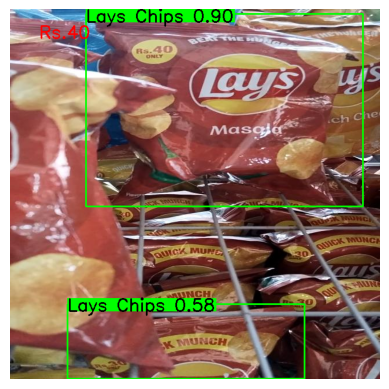

2 Lays Chips(s) detected


In [12]:

!pip install ultralytics
from doctr.models import ocr_predictor
from doctr.io import DocumentFile
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

model_yolo = YOLO("/content/Yolov8.pt")

model_ocr = ocr_predictor(pretrained=True)

image_path = "/content/products-1/test/images/video_20240623_121318_mp4-0029_jpg.rf.e81eb3d160fc83c43d2e5584255e2357.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

results = model_yolo.predict(image)
class_counts = {}

plt.imshow(image_rgb)

for result in results:
    boxes = result.boxes.xyxy
    confidences = result.boxes.conf
    class_ids = result.boxes.cls

    for box, confidence, class_id in zip(boxes, confidences, class_ids):
        if confidence > 0.5:
            x1, y1, x2, y2 = map(int, box)
            class_name = model_yolo.names[int(class_id)]
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = f"{class_name} {confidence:.2f}"
            font_scale = 1.0
            thickness = 2
            label_size, _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)
            label_y1 = max(y1 - 10, 0)
            label_y2 = label_y1 + label_size[1]

            cv2.rectangle(image_rgb, (x1, label_y1), (x1 + label_size[0], label_y2), (0, 255, 0), -1)
            cv2.putText(image_rgb, label, (x1, label_y2), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 0), thickness)  # Black text

            if class_name in class_counts:
                class_counts[class_name] += 1
            else:
                class_counts[class_name] = 1

### 2. Perform OCR to Extract Prices

single_img_doc = DocumentFile.from_images(image_path)

ocr_result = model_ocr(single_img_doc)

currency_symbols = ['$', 'PKR', 'Rs.', 'Inr', 'π']
extracted_texts = []
prices = []

for page in ocr_result.pages:
    for block in page.blocks:
        for line in block.lines:
            for word in line.words:
                text = word.value
                extracted_texts.append(text)

                if any(symbol in text for symbol in currency_symbols):
                    prices.append(text)

for text in prices:

    x, y = 50, 50
    cv2.putText(image_rgb, text, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 0, 0), 2)
    y += 30

for text in extracted_texts:
    print(f"Extracted Text: {text}")
if prices:
    print("\nIdentified Prices:")
    for price in prices:
        print(f"Price: {price}")
else:
    print("\nNo prices identified.")

plt.axis('off')
plt.imshow(image_rgb)
plt.show()

for class_name, count in class_counts.items():
    print(f'{count} {class_name}(s) detected')
